In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Logistic regression default

Default (with enrolled)
Dropout F1 Score: 0.7276051188299817
              precision    recall  f1-score   support

     Dropout       0.76      0.70      0.73       284
    Enrolled       0.52      0.07      0.12       159
    Graduate       0.68      0.92      0.78       442

    accuracy                           0.70       885
   macro avg       0.65      0.56      0.54       885
weighted avg       0.68      0.70      0.65       885



c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


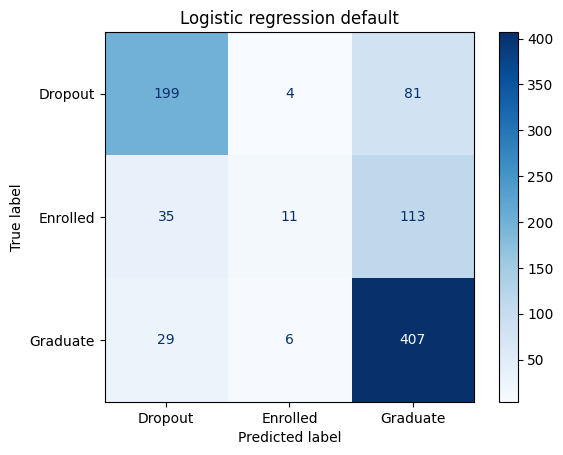

In [45]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Default (with enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression default")
plt.show()

Logistic regression without enrolled

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Default (without enrolled)
Dropout F1 Score: 0.796844181459566
              precision    recall  f1-score   support

     Dropout       0.91      0.71      0.80       284
    Graduate       0.84      0.95      0.89       442

    accuracy                           0.86       726
   macro avg       0.87      0.83      0.84       726
weighted avg       0.86      0.86      0.85       726



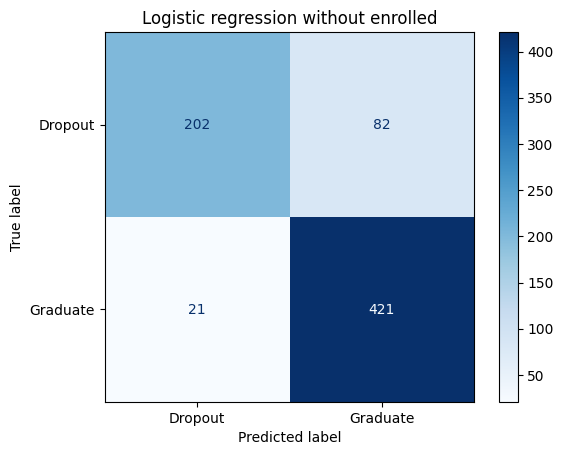

In [46]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Default (without enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression without enrolled")
plt.show()

Random forest classifier

Import RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

Random forest classifier default (with enrolled)

Random forest (with enrolled)
Dropout F1 Score: 0.7901234567901234
              precision    recall  f1-score   support

     Dropout       0.79      0.79      0.79       284
    Enrolled       0.52      0.36      0.43       159
    Graduate       0.81      0.90      0.85       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.77      0.76       885



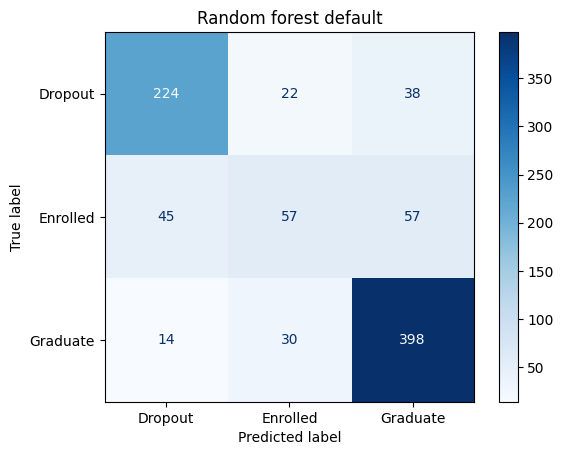

In [48]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (with enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest default")
plt.show()

Random forest classifier without enrolled

Random forest (without enrolled)
Dropout F1 Score: 0.8614800759013282
              precision    recall  f1-score   support

     Dropout       0.93      0.80      0.86       284
    Graduate       0.88      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



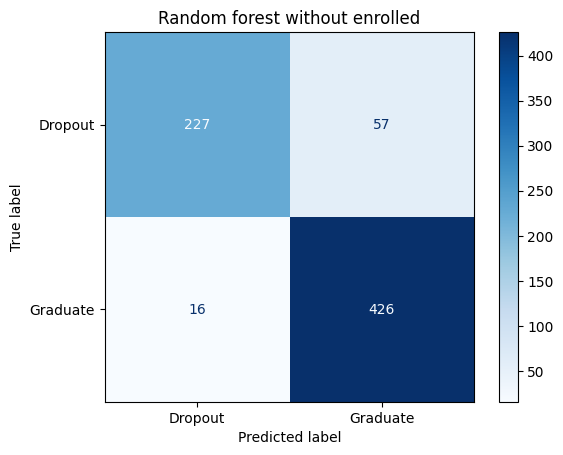

In [49]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (without enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest without enrolled")
plt.show()

Regressão logistica teve melhoras com a remoção da classe enrolled (uma vez que essa classe não obtem métricas boas).

Porém o random forest se supera (tanto com a classe enrolled ou não), o que mais se destaca é o random forest treinado sem a classe enrolled.

Aplicaremos diferentes scalers em diferentes colunas, com o auxilio do optuna, para observar o F1 score

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import optuna

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I 2025-05-29 17:34:58,917] Using an existing study with name 'no-name-1fe9fa4c-4435-427d-91ce-aedf459fbb4a' instead of creating a new one.


Random forest (without enrolled and scaler)
Dropout F1 Score: 0.8656716417910447
              precision    recall  f1-score   support

     Dropout       0.92      0.82      0.87       284
    Graduate       0.89      0.95      0.92       442

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



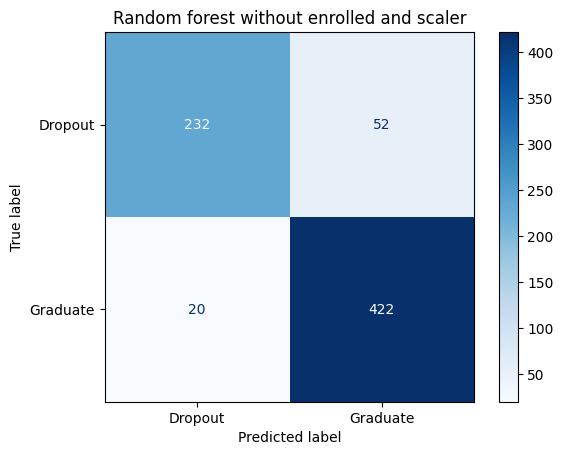

In [60]:
def objective(trial:optuna.Trial):
    transformers = []
    scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }
    for col in X.columns:
        scaler_choice = trial.suggest_categorical(f"scaler_{col}", list(scaler_options.keys()))
        transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

    col_transformer = ColumnTransformer(transformers)
    pipe = Pipeline([
        # ("scaler", StandardScaler()),
        ("scaler", col_transformer),
        ("clf", RandomForestClassifier()),
    ])
    pipe.fit(X_train,y_train)
    preds = pipe.predict(X_test)
    return f1_score(y_test, preds)

study = optuna.create_study(direction="maximize",
                            storage="sqlite:///random_forest_scaler.db",
                            load_if_exists=True,
                            study_name="no-name-1fe9fa4c-4435-427d-91ce-aedf459fbb4a")
# study.optimize(objective, n_trials=1000)
# Rebuild transformers from study.best_params
transformers = []
scaler_options = {  
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }
for key, value in study.best_params.items():
    if key.startswith("scaler_"):
        column_name = key.replace("scaler_", "")
        scaler = scaler_options[value]
        transformers.append((f"{column_name}_scaler", scaler, [column_name]))
# Create the ColumnTransformer
col_transformer = ColumnTransformer(transformers)
pipe = Pipeline([
    # ("scaler", StandardScaler()),
    ("scaler", col_transformer),
    ("clf", RandomForestClassifier()),
])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (without enrolled and scaler)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest without enrolled and scaler")
plt.show()

Próximo passo, aplicar PCA utilizando como estimator o random forest (com hiperparametros padrões)